## Restaurant Review - Word Embedding ##

## Import the dataset and create Data Frame

In [80]:
import pandas as pd

# Specify the raw path to your TSV file
tsv_file_path = 'https://raw.githubusercontent.com/vinothngit/datascience/09e8fdb7fde0937d48f26a79cc3952e320fff2fa/Restaurant_Reviews.tsv'

# Use pd.read_csv() with the delimiter parameter set to '\t' for tab separation
df = pd.read_csv(tsv_file_path, delimiter='\t')

# Display the DataFrame
print(df)


                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


## Part 1 - Bigram model

## Create the corpus from input data and build bi-gram model

 - *1. Create Corpus from the input data*
 - *2. Generate bigrams using 'bigrams' NLTK lib*
 - *3. bigrams are calculated considering Start & End tokens in corpus*
 - *4. "model" stores the probabilities of each bigram*                                                

In [72]:
from nltk import bigrams, word_tokenize
from collections import defaultdict
import pandas as pd

#training_corpus = df['Review'].apply(word_tokenize).tolist()
training_corpus = df['Review'].str.split().tolist()

# Create a placeholder for the model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurrence.
# Consider <Start> <end> of sentence also as tokens
for review_tokens in training_corpus:
    for w1, w2 in bigrams(review_tokens, pad_right=True, pad_left=True): 
        model[w1][w2] += 1

# Transform counts to probabilities
for w1 in model:
    total_count = float(sum(model[w1].values()))
    for w2 in model[w1]:
        model[w1][w2] /= total_count

# Display the Training Corpus  - Debug
#print(training_corpus)
#print(model)

## Predict probability of Sentence using bi-gram model

In [73]:

# Predictions
test_sentence_1 = "Crust is not good."
test_sentence_2 = "Loved the texture"

test_tokens_1 = test_sentence_1.split()
test_tokens_2 = test_sentence_2.split()
print("Test tokens Sentence 1", test_tokens_1)
print("Test tokens Sentence 2", test_tokens_2)


# Calculate bigram probabilities for the test sentences
test_probabilities_1 = [model[test_tokens_1[i - 1]][test_tokens_1[i]] for i in range(1, len(test_tokens_1))]
test_probabilities_2 = [model[test_tokens_2[i - 1]][test_tokens_2[i]] for i in range(1, len(test_tokens_2))]

#print("Bigram Probabilities for Test Sentence 1:", test_probabilities_1)
#print("Bigram Probabilities for Test Sentence 2:", test_probabilities_2)


# Calculate sentence probabilities manually using formula 
sentence_probability_1 = 1.0
for prob in test_probabilities_1:
    sentence_probability_1 *= prob

sentence_probability_2 = 1.0
for prob in test_probabilities_2:
    sentence_probability_2 *= prob

print("\nSentence Probability for Test Sentence 1:", sentence_probability_1)
print("\nSentence Probability for Test Sentence 2:", sentence_probability_2)

Test tokens Sentence 1 ['Crust', 'is', 'not', 'good.']
Test tokens Sentence 2 ['Loved', 'the', 'texture']

Sentence Probability for Test Sentence 1: 0.0024981547720433765

Sentence Probability for Test Sentence 2: 0.0


In [74]:
!pip install prettytable

## Sentence Probability BEFORE Smoothing ##

In [75]:

from prettytable import PrettyTable

# Create a PrettyTable for a visually appealing table
table = PrettyTable()
table.field_names = ["\033[1mTest Sentence\033[0m", "\033[1mProbability\033[0m"]

# Add data to the table
table.add_row(["Sentence 1", f"{sentence_probability_1:.6f}"])
table.add_row(["Sentence 2", f"{sentence_probability_2:.6f}"])

# Set the title
table.title = "\033[1mSentence probability before smoothing\033[0m"

# Print the table
print(table)

+-----------------------------------------------+
|     Sentence probability before smoothing     |
+------------------------+----------------------+
|     Test Sentence      |     Probability      |
+------------------------+----------------------+
|       Sentence 1       |       0.002498       |
|       Sentence 2       |       0.000000       |
+------------------------+----------------------+


## Laplace Smoothing

## Laplace smoothing (add-one smoothing) will address the issue of zero probabilities for unseen events. 
In above code we observed a ZERO PROBABILITY for Sentence 2. This smoothing prevents the model from assigning absolute zero probability to unseen word combinations. 
This ensures a more robust estimation of probabilities and stable language model

In [76]:
# Count frequency of co-occurrence with Laplace smoothing
alpha = 1  # Laplace smoothing parameter

# As done before smotthing consider start and end tokens as a part of corpus 

for review_tokens in training_corpus:
    for w1, w2 in bigrams(review_tokens, pad_right=True, pad_left=True):
        model[w1][w2] += 1

# Transform counts to probabilities with Laplace smoothing
for w1 in model:
    total_count = float(sum(model[w1].values()) + (alpha * len(model[w1])))
    for w2 in model[w1]:
        model[w1][w2] = (model[w1][w2] + alpha) / total_count


## Predict probability of Sentence using bi-gram model - After Smoothing

In [77]:
# Calculate bigram probabilities for the test sentences with Laplace smoothing
test_probabilities_1 = [model[test_tokens_1[i - 1]][test_tokens_1[i]] for i in range(1, len(test_tokens_1))]
test_probabilities_2 = [model[test_tokens_2[i - 1]][test_tokens_2[i]] for i in range(1, len(test_tokens_2))]

sentence_probability_1 = 1.0
for prob in test_probabilities_1:
    sentence_probability_1 *= prob

sentence_probability_2 = 1.0
for prob in test_probabilities_2:
    sentence_probability_2 *= prob

print("\nSentence Probability for Test Sentence 1 with Laplace smoothing:", sentence_probability_1)
print("\nSentence Probability for Test Sentence 2 with Laplace smoothing:", sentence_probability_2)


Sentence Probability for Test Sentence 1 with Laplace smoothing: 0.0012966353475491834

Sentence Probability for Test Sentence 2 with Laplace smoothing: 0.0004754200227451253


## Sentence Probability AFTER Laplace Smoothing ##

In [78]:
# Create a PrettyTable for a visually appealing table
table = PrettyTable()
table.field_names = ["\033[1mTest Sentence\033[0m", "\033[1mProbability\033[0m"]

# Add data to the table
table.add_row(["Sentence 1", f"{sentence_probability_1:.6f}"])
table.add_row(["Sentence 2", f"{sentence_probability_2:.6f}"])

# Set the title
table.title = "\033[1mSentence probability before smoothing\033[0m"

# Print the table
print(table)

+-----------------------------------------------+
|     Sentence probability before smoothing     |
+------------------------+----------------------+
|     Test Sentence      |     Probability      |
+------------------------+----------------------+
|       Sentence 1       |       0.001297       |
|       Sentence 2       |       0.000475       |
+------------------------+----------------------+


## Part 2 - Pre-processing

In [44]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Pre-process each review -

reviews = df['Review'].tolist()

# i) Text Preprocessing
def preprocess_text(review):
    # Tokenization
    tokens = nltk.word_tokenize(review)
    #print("Tokens after tokenization:", tokens)

    # Lowercasing
    tokens = [token.lower() for token in tokens]
    #print("Tokens after lowercasing:", tokens)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    #print("Tokens after removing punctuation:", tokens)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    print("Tokens after removing stop words:", tokens)

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    #print("Tokens after stemming:", tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    #print("Tokens after lemmatization:", tokens)

    print("Tokens after pre-processing:", tokens)

    return tokens

preprocessed_reviews = [preprocess_text(review) for review in reviews]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokens after removing stop words: ['wow', '...', 'loved', 'place']
Tokens after pre-processing: ['wow', '...', 'love', 'place']
Tokens after removing stop words: ['crust', 'good']
Tokens after pre-processing: ['crust', 'good']
Tokens after removing stop words: ['tasty', 'texture', 'nasty']
Tokens after pre-processing: ['tasti', 'textur', 'nasti']
Tokens after removing stop words: ['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
Tokens after pre-processing: ['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love']
Tokens after removing stop words: ['selection', 'menu', 'great', 'prices']
Tokens after pre-processing: ['select', 'menu', 'great', 'price']
Tokens after removing stop words: ['getting', 'angry', 'want', 'damn', 'pho']
Tokens after pre-processing: ['get', 'angri', 'want', 'damn', 'pho']
Tokens after removing stop words: ['honeslty', "n't", 'taste', 'fresh']
Tokens after pre-processing: ['honeslti', "n't", 'tast', 

Tokens after removing stop words: ['good', 'thing', 'waiter', 'helpful', 'kept', 'bloddy', 'mary', "'s", 'coming']
Tokens after pre-processing: ['good', 'thing', 'waiter', 'help', 'kept', 'bloddi', 'mari', "'s", 'come']
Tokens after removing stop words: ['best', 'buffet', 'town', 'price', 'beat']
Tokens after pre-processing: ['best', 'buffet', 'town', 'price', 'beat']
Tokens after removing stop words: ['loved', 'mussels', 'cooked', 'wine', 'reduction', 'duck', 'tender', 'potato', 'dishes', 'delicious']
Tokens after pre-processing: ['love', 'mussel', 'cook', 'wine', 'reduct', 'duck', 'tender', 'potato', 'dish', 'delici']
Tokens after removing stop words: ['one', 'better', 'buffets']
Tokens after pre-processing: ['one', 'better', 'buffet']
Tokens after removing stop words: ['went', 'tigerlilly', 'fantastic', 'afternoon']
Tokens after pre-processing: ['went', 'tigerlilli', 'fantast', 'afternoon']
Tokens after removing stop words: ['food', 'delicious', 'bartender', 'attentive', 'personable

Tokens after removing stop words: ['favorite', 'place', 'town', 'shawarrrrrrma']
Tokens after pre-processing: ['favorit', 'place', 'town', 'shawarrrrrrma']
Tokens after removing stop words: ['black', 'eyed', 'peas', 'sweet', 'potatoes', '...', 'unreal']
Tokens after pre-processing: ['black', 'eye', 'pea', 'sweet', 'potato', '...', 'unreal']
Tokens after removing stop words: ['wo', "n't", 'disappointed']
Tokens after pre-processing: ['wo', "n't", 'disappoint']
Tokens after removing stop words: ['could', 'serve', 'vinaigrette', 'may', 'make', 'better', 'overall', 'dish', 'still', 'good']
Tokens after pre-processing: ['could', 'serv', 'vinaigrett', 'may', 'make', 'better', 'overal', 'dish', 'still', 'good']
Tokens after removing stop words: ['go', 'far', 'many', 'places', "'ve", 'never', 'seen', 'restaurant', 'serves', '1', 'egg', 'breakfast', 'especially', '4.00']
Tokens after pre-processing: ['go', 'far', 'mani', 'place', "'ve", 'never', 'seen', 'restaur', 'serv', '1', 'egg', 'breakfast

Tokens after removing stop words: ["'ll", 'regular', 'stop', 'trips', 'phoenix']
Tokens after pre-processing: ["'ll", 'regular', 'stop', 'trip', 'phoenix']
Tokens after removing stop words: ['really', 'enjoyed', 'crema', 'café', 'expanded', 'even', 'told', 'friends', 'best', 'breakfast']
Tokens after pre-processing: ['realli', 'enjoy', 'crema', 'café', 'expand', 'even', 'told', 'friend', 'best', 'breakfast']
Tokens after removing stop words: ['good', 'money']
Tokens after pre-processing: ['good', 'money']
Tokens after removing stop words: ['miss', 'wish', 'one', 'philadelphia']
Tokens after pre-processing: ['miss', 'wish', 'one', 'philadelphia']
Tokens after removing stop words: ['got', 'sitting', 'fairly', 'fast', 'ended', 'waiting', '40', 'minutes', 'place', 'order', 'another', '30', 'minutes', 'food', 'arrived']
Tokens after pre-processing: ['got', 'sit', 'fairli', 'fast', 'end', 'wait', '40', 'minut', 'place', 'order', 'anoth', '30', 'minut', 'food', 'arriv']
Tokens after removing 

Tokens after removing stop words: ['pricing', 'bit', 'concern', 'mellow', 'mushroom']
Tokens after pre-processing: ['price', 'bit', 'concern', 'mellow', 'mushroom']
Tokens after removing stop words: ['worst', 'thai', 'ever']
Tokens after pre-processing: ['worst', 'thai', 'ever']
Tokens after removing stop words: ['stay', 'vegas', 'must', 'get', 'breakfast', 'least']
Tokens after pre-processing: ['stay', 'vega', 'must', 'get', 'breakfast', 'least']
Tokens after removing stop words: ['want', 'first', 'say', 'server', 'great', 'perfect', 'service']
Tokens after pre-processing: ['want', 'first', 'say', 'server', 'great', 'perfect', 'servic']
Tokens after removing stop words: ['pizza', 'selections', 'good']
Tokens after pre-processing: ['pizza', 'select', 'good']
Tokens after removing stop words: ['strawberry', 'tea', 'good']
Tokens after pre-processing: ['strawberri', 'tea', 'good']
Tokens after removing stop words: ['highly', 'unprofessional', 'rude', 'loyal', 'patron']
Tokens after pre-p

## Vectorization - word embedding (Feature Extraction)

## Word embeddings capture semantic relationships
## Word2Vec is chosen here. It represent words in dense vector spaces, preserving semantic meanings and relationships.

## Skipgram model is used in this word embedding
-- *Parameters to construct a model*   

    sentences -- The input corpus (list of sentences or words)
    
    vector_size -- Dimensionality of the word vectors (size of the embedding). 
    
    window -- Maximum distance between the current and predicted word within a sentence. 
    
    sg -- Skip-gram model if sg=1, CBOW model if sg=0
    
    min_count --  Words with a frequency below this threshold are ignored.

In [45]:

# Feature Extraction: Word Embedding using Skip-Gram
model = Word2Vec(
    sentences=preprocessed_reviews,  # The input corpus (list of sentences or words)
    vector_size=100,  # Each word will be represented as a vector of 100 dimensions.
    window=5,  # Windows size to capture the context. 
    sg=1,  # Skip-gram model if sg=1, CBOW model if sg=0
    min_count=1  # Considering all words
)

# Save the model 
# model.save("word2vec.model")

# You can access the word embeddings using model.wv
word_embeddings = model.wv

## Similarity Analysis

## Cosine Similarity is used for word embeddings as it measures the cosine of the angle between two word vectors, 
## It captures the direction of similarity.

In [47]:
from IPython.core.display import HTML
import itertools
from gensim.models import Word2Vec

word_vectors = model.wv

# Function to find and create HTML representation for the pair of words with the highest similarity score
def highest_similarity_pair_visual(word_vectors, vocabulary):
    max_similarity = 0.0
    best_pair = None

    for pair in itertools.combinations(vocabulary, 2):
        # Check for empty strings or special characters
        if all(word.isalnum() or word.isspace() for word in pair):
            word1_vector = word_vectors[pair[0]].reshape(1, -1)
            word2_vector = word_vectors[pair[1]].reshape(1, -1)

            # Calculate cosine similarity between the two words
            similarity = cosine_similarity(word1_vector, word2_vector)[0][0]

            # Update if the current pair has a higher similarity score
            if similarity > max_similarity:
                max_similarity = similarity
                best_pair = pair

    # Create HTML representation with highlighted words
    highlighted_text = f"Top two similar words: <span style='color:red'>{best_pair[0]}</span> and <span style='color:red'>{best_pair[1]}</span> with similarity score: {max_similarity}"
    return HTML(highlighted_text)

# Display the HTML representation
display(highest_similarity_pair_visual(word_vectors, vocabulary))


## DISPLAY TOP TWO SIMILAR WORDS 

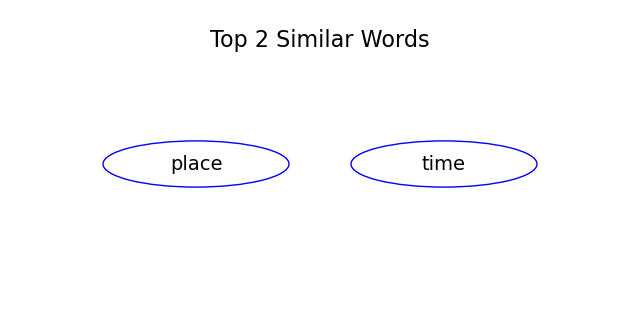

In [62]:
# Display the words in a visual format
fig, ax = plt.subplots(figsize=(8, 4))

# Add headline
ax.text(0.5, 0.9, colored("Top 2 Similar Words", 'blue', attrs=['bold', 'large']), fontsize=16, ha='center', va='center')

# Draw a circle around the first word
ellipse_1 = Ellipse(xy=(0.3, 0.5), width=0.3, height=0.15, edgecolor='blue', facecolor='none')
ax.add_patch(ellipse_1)

# Display the first word inside the circle
ax.text(0.3, 0.5, colored(best_pair[0], 'blue', attrs=['bold', 'big']), fontsize=14, ha='center', va='center')

# Draw a circle around the second word
ellipse_2 = Ellipse(xy=(0.7, 0.5), width=0.3, height=0.15, edgecolor='blue', facecolor='none')
ax.add_patch(ellipse_2)

# Display the second word inside the circle
ax.text(0.7, 0.5, colored(best_pair[1], 'blue', attrs=['bold', 'big']), fontsize=14, ha='center', va='center')


ax.axis('off')

# Show the plot
plt.show()

## PCA is used for dimensionality reduction to visualize the embeddings in 2D space
## Below visual provided insights into the relationships between words.


## Visualization using PCA 

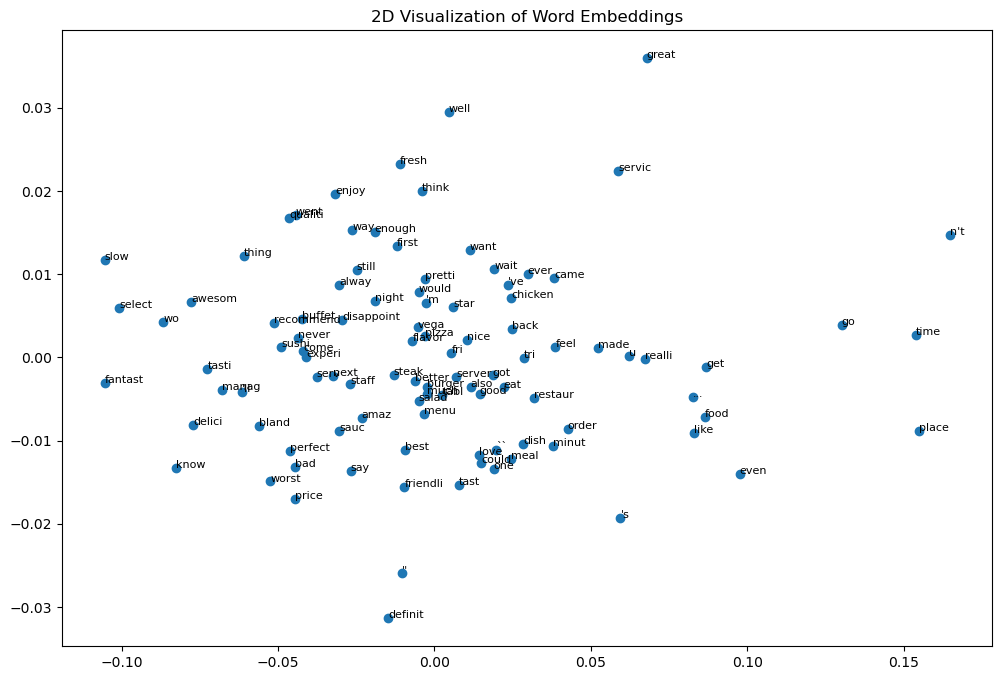

In [61]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Visualize a subset of the embeddings in 2D space using PCA
def visualize_embeddings(model, subset_size=100):
    # Take a subset of embeddings
    subset_words = list(model.wv.index_to_key)[:subset_size]
    subset_embeddings = [model.wv[word] for word in subset_words]

    # Use PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    result = pca.fit_transform(subset_embeddings)

    # Scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(subset_words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8)

    plt.title('2D Visualization of Word Embeddings')
    plt.show()

# Visualize a subset of the embeddings
visualize_embeddings(model, subset_size=100)



## End ##